In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 example_iterrows	 get_column_descriptions	 
load_csv	 load_dataframes	 load_object	 math	 os	 pd	 pickle	 save_dataframes	 store_objects	 
sys	 


In [23]:

# From https://www.heritage.org/index/ranking
file_name = r'../data/html/capitalism_by_country.html'
capitalism_df = pd.read_html(file_name)[0]
capitalism_df.columns = ['Rank', 'Country', 'Overall Capitalism', 'Change']
capitalism_df.sample(10).T

,51,77,162,137,100,149,176,119,54,48
Rank,73,86,160,147,97,153,167,138,45,42
Country,Cabo Verde,Croatia,Liberia,Ukraine,Moldova,Malawi,Sierra Leone,Zambia,Peru,Romania
Overall Capitalism,63.1,61.4,49.7,52.3,59.1,51.4,47.5,53.6,67.8,68.6
Change,3.1,0.4,-1.2,0.4,0.7,-0.6,-4.3,-0.7,-0.9,-0.8


In [9]:

# From https://en.wikipedia.org/wiki/List_of_countries_by_income_equality
file_name = r'../data/html/income_inequality_by_country.html'
income_inequality_df = pd.read_html(file_name)[0]
income_inequality_df.sample(10).T

,141,144,3,166,55,133,80,68,130,58
Country,Slovenia,South Sudan,Angola,United Arab Emirates,The Gambia,Sao Tome and Principe,Kenya,Iceland,Romania,Ghana
UN R/P 10%,5.9,NaN,NaN,NaN,20.2,NaN,13.6,NaN,7.5,14.1
UN R/P 20%,3.7,13,9,NaN,5.9,4.7,11.5,3.6,4.3,8.9
World Bank Gini %,25.7,45.5,42.7,NaN,47.3,30.8,47.7,25.6,27.5,42.8
World Bank Gini Year,2014,2009,2008,NaN,2003,2010,2005,2014,2013,2006
CIA R/P 10%,5.9,NaN,NaN,NaN,20.6,NaN,18.6,NaN,7.4,13.7
CIA R/P Year,1998,NaN,NaN,NaN,1998,NaN,2000,NaN,2003,1999
CIA Gini %,23.7,46,NaN,NaN,50.2,NaN,42.5,28,27.3,42.3
CIA Gini Year,2012,2010 est.,NaN,NaN,1998,NaN,2008 est.,2006,2012,2012â2013


In [18]:

capitalism_country_list = capitalism_df['Country'].tolist()
len(capitalism_country_list)

182

In [14]:

income_inequality_country_list = income_inequality_df['Country'].tolist()
len(income_inequality_country_list)

178

In [19]:

common_country_list = list(set.intersection(set(capitalism_country_list),
                                            set(income_inequality_country_list)))
len(common_country_list)

162

In [24]:

merge_df = pd.merge(left=capitalism_df, right=income_inequality_df, how='inner', on=['Country'],
                    suffixes=('_capitalism', '_income_inequality'))
merge_df.sample(10).T

,104,120,51,151,97,4,100,29,121,40
Rank,137,146,46,163,101,3,135,19,115,40
Country,Ethiopia,The Gambia,Poland,Mozambique,Papua New Guinea,New Zealand,Guinea-Bissau,Sweden,Sri Lanka,Uruguay
Overall Capitalism,53.6,52.4,67.8,48.6,58.4,84.4,54,75.2,56.4,68.6
Change,0.8,0.1,-0.7,2.3,2.7,0.2,-2.9,-1.1,-1.4,-0.6
UN R/P 10%,6.6,20.2,8.8,18.8,23.8,12.4,19,6.2,11.1,11.8
UN R/P 20%,7.1,5.9,5,14.2,9.3,NaN,12.6,4.6,6.8,7.9
World Bank Gini %,33.2,47.3,32.1,45.6,43.9,NaN,50.7,27.2,39.8,39.7
World Bank Gini Year,2010,2003,2014,2008,2009,NaN,2010,2014,2016,2016
CIA R/P 10%,6.5,20.6,8.7,18.8,23.8,NaN,84.8,6.2,36.1,17.9
CIA R/P Year,2000,1998,2002,2002,1996,NaN,1991,2000,2003/04 FY,2003


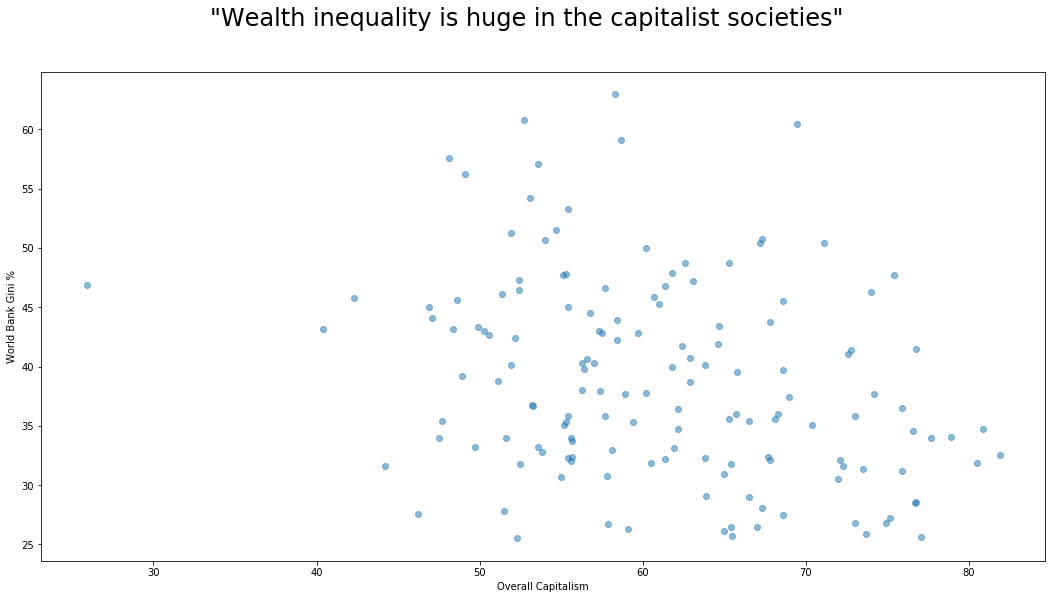

In [44]:

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 9))

# Explanatory variable
xname = 'Overall Capitalism'
xlabel_text = plt.xlabel(xname)

# Response variable
yname = 'World Bank Gini %'
ylabel_text = plt.ylabel(yname)

# Remove NaNs
columns_list = ['Country', xname, yname]
df = merge_df[columns_list].dropna()
xdata = df[xname]
ydata = df[yname]

path_collection = plt.scatter(xdata, ydata, alpha=0.5)
title_obj = fig.suptitle('"Wealth inequality is huge in the capitalist societies"',
                         fontsize=24)

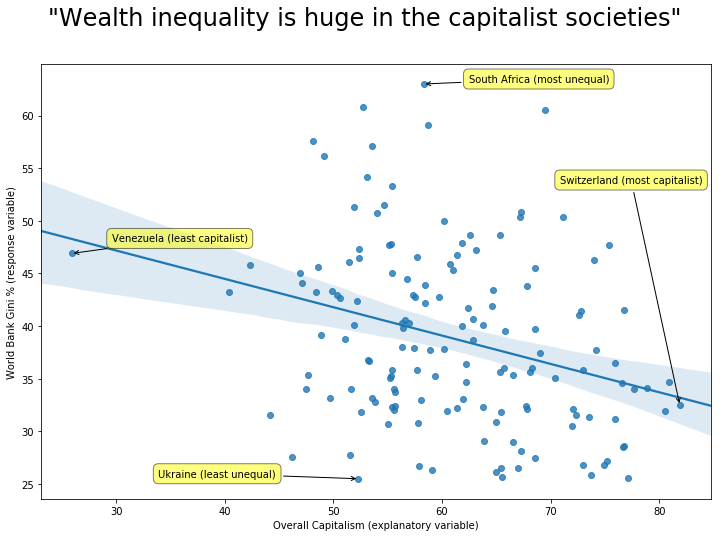

In [52]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=df)
xlabel_str = 'Overall Capitalism (explanatory variable)'
xlabel_text = plt.xlabel(xlabel_str)
ylabel_str = 'World Bank Gini % (response variable)'
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_capitalist = xdata.min()
most_capitalist = xdata.max()
most_unequal = ydata.max()
least_unequal = ydata.min()
for label, x, y in zip(df['Country'], xdata, ydata):
    if (x == least_capitalist):
        annotation = plt.annotate('{} (least capitalist)'.format(label),
                                  xy=(x, y), xytext=(40, 10), **kwargs)
    elif (x == most_capitalist):
        annotation = plt.annotate('{} (most capitalist)'.format(label),
                                  xy=(x, y), xytext=(-120, 220), **kwargs)
    elif (y == most_unequal):
        annotation = plt.annotate('{} (most unequal)'.format(label),
                                  xy=(x, y), xytext=(45, 0), **kwargs)
    elif (y == least_unequal):
        annotation = plt.annotate('{} (least unequal)'.format(label),
                                  xy=(x, y), xytext=(-200, 0), **kwargs)
title_obj = fig1_fig.suptitle('"Wealth inequality is huge in the capitalist societies"',
                              fontsize=24)

In [53]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [54]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))